In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Verificar si entidades con mayor densidad de habitantes consumen agua. Una primera gráfica sería el gasto de agua per cápita por alcaldia. Otras serían a mayor poblacion más gasto domestico. ¿Y qué tal el gasto no domestico

In [2]:
df = pd.read_csv("data_consumo_agua.csv")
df.head(10)
df.indice_des.value_counts()

bajo       29248
popular    16539
alto       15516
medio       9799
Name: indice_des, dtype: int64

In [3]:
indice_des_dum = []

for row in df.indice_des:
    if row == 'popular':
        indice_des_dum.append(1)
    elif row == 'bajo':
        indice_des_dum.append(2)
    elif row == 'medio':
        indice_des_dum.append(3)
    else:
        indice_des_dum.append(4)

indice_desarrollo = np.array(indice_des_dum)         

df['dum_ind_des'] = indice_desarrollo

df

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud,dum_ind_des
0,159.72,2019,Gustavo A. Madero,42.566364,468.23,gustavo a. madero,7 de noviembre,53.240000,631.00,42.066667,3.050000,3,3.05,57250,alto,19.455260,-99.112662,4
1,0.00,2019,Gustavo A. Madero,35.936667,107.81,gustavo a. madero,7 de noviembre,0.000000,115.13,28.782500,7.320000,3,7.32,57253,medio,19.455260,-99.112662,3
2,0.00,2019,Gustavo A. Madero,24.586000,122.93,gustavo a. madero,7 de noviembre,0.000000,197.96,32.993333,75.030000,3,75.03,57255,popular,19.455720,-99.113582,1
3,0.00,2019,Gustavo A. Madero,0.000000,0.00,gustavo a. madero,nueva tenochtitlan,0.000000,253.53,84.510000,84.510000,3,253.53,57267,bajo,19.459647,-99.104469,2
4,56.72,2019,Azcapotzalco,67.436250,539.49,azcapotzalco,prohogar,56.720000,839.35,76.304545,121.570000,3,243.14,57330,bajo,19.474161,-99.146750,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71097,NaN,2019,Cuauhtémoc,20.053112,3930.41,cuauhtemoc,guerrero,NaN,4286.28,19.307568,13.687308,1,355.87,233,bajo,19.448564,-99.139940,2
71098,71.30,2019,Cuauhtémoc,21.126615,9549.24,cuauhtemoc,guerrero,35.650001,9796.12,20.976702,13.506923,1,175.59,238,popular,19.449339,-99.145719,1
71099,759.16,2019,Cuauhtémoc,27.527778,4707.25,cuauhtemoc,guerrero,94.894999,5692.81,29.344381,15.093334,1,226.40,239,bajo,19.448392,-99.145930,2
71100,402.65,2019,Cuauhtémoc,30.605000,550.89,cuauhtemoc,guerrero,100.662498,963.15,41.876087,9.610000,1,9.61,244,bajo,19.447587,-99.142509,2


In [51]:
habitantes_df = df[['alcaldia','consumo_total','consumo_total_dom',\
                    'consumo_total_no_dom','consumo_total_mixto','consumo_prom',\
                    'consumo_prom_dom','consumo_prom_no_dom','']]\
                    .groupby(['alcaldia'], as_index=False)\
                    .sum().sort_index()

habitantes_df

,alcaldia,consumo_total,consumo_total_dom,consumo_total_no_dom,consumo_total_mixto,consumo_prom,consumo_prom_dom,consumo_prom_no_dom
0,alvaro obregon,9.608503e+06,6.590161e+06,2492864.010,525476.88,5.722891e+05,165140.826183,7.491385e+05
1,azcapotzalco,8.969567e+06,6.153755e+06,1897004.540,918808.67,5.814433e+05,137325.643978,5.880746e+05
2,benito juarez,1.378012e+07,9.894931e+06,2815269.571,1069917.90,4.439559e+05,147798.334937,5.998937e+05
3,coyoacan,7.687908e+06,5.128303e+06,2209569.070,350036.32,6.748006e+05,131792.337620,8.051919e+05
4,cuajimalpa,2.947514e+06,2.064264e+06,736118.460,147131.73,1.203496e+05,30442.779860,1.818943e+05
5,cuauhtemoc,1.865082e+07,1.034611e+07,6074370.831,2230334.04,1.233967e+06,176414.349961,1.349030e+06
6,gustavo a. madero,1.348010e+07,9.196449e+06,2740658.660,1542992.79,8.862796e+05,284723.303485,8.952375e+05
7,iztacalco,6.260631e+06,4.663498e+06,909975.230,687157.63,2.390463e+05,108622.952577,2.577524e+05
8,iztapalapa,8.313290e+06,5.263020e+06,2213018.590,837251.60,7.692956e+05,187166.924283,7.498378e+05
9,magdalena contreras,1.271478e+06,8.449665e+05,361492.280,65018.72,7.916205e+04,34149.057649,1.089740e+05


In [62]:
df_alc = pd.read_csv('alcaldias.csv')

col_names = df_alc.columns.to_list()
col_name = []
for i in range(len(col_names)):
    col_name.append(col_names[i].replace(" ", "").lower())
df_alc.columns =col_name

df_alc['alcaldia'] = df_alc['alcaldia'].str.lower()

df_alc.drop(['clave'], axis = 1, inplace = True)

#df_alc['alcaldia'] = habitantes_df['alcaldia']

df_alc["habitantes"] = pd.to_numeric(df_alc["habitantes"])

df_alc = df_alc.sort_values('alcaldia')

df_alc

,alcaldia,habitantes
2,alvaro obregon,749982
9,azcapotzalco,400161
7,benito juarez,417416
4,coyoacan,608479
14,cuajimalpa,199224
5,cuauhtemoc,532553
1,gustavo a. madero,1164477
10,iztacalco,390348
0,iztapalapa,1827868
13,magdalena contreras,243886


In [63]:
hab = pd.merge(habitantes_df, df_alc, how ='left', on ='alcaldia').sort_values(by=['consumo_total'], ascending=False)

hab

,alcaldia,consumo_total,consumo_total_dom,consumo_total_no_dom,consumo_total_mixto,consumo_prom,consumo_prom_dom,consumo_prom_no_dom,habitantes
5,cuauhtemoc,1.865082e+07,1.034611e+07,6074370.831,2230334.04,1.233967e+06,176414.349961,1.349030e+06,532553
10,miguel hidalgo,1.449040e+07,8.640463e+06,4687309.460,1162625.38,9.853498e+05,212477.984926,1.179413e+06,364439
2,benito juarez,1.378012e+07,9.894931e+06,2815269.571,1069917.90,4.439559e+05,147798.334937,5.998937e+05,417416
6,gustavo a. madero,1.348010e+07,9.196449e+06,2740658.660,1542992.79,8.862796e+05,284723.303485,8.952375e+05,1164477
0,alvaro obregon,9.608503e+06,6.590161e+06,2492864.010,525476.88,5.722891e+05,165140.826183,7.491385e+05,749982
1,azcapotzalco,8.969567e+06,6.153755e+06,1897004.540,918808.67,5.814433e+05,137325.643978,5.880746e+05,400161
8,iztapalapa,8.313290e+06,5.263020e+06,2213018.590,837251.60,7.692956e+05,187166.924283,7.498378e+05,1827868
3,coyoacan,7.687908e+06,5.128303e+06,2209569.070,350036.32,6.748006e+05,131792.337620,8.051919e+05,608479
14,venustiano carranza,7.093249e+06,5.007008e+06,1210723.040,875518.47,3.787268e+05,155482.383705,3.742682e+05,427263
7,iztacalco,6.260631e+06,4.663498e+06,909975.230,687157.63,2.390463e+05,108622.952577,2.577524e+05,390348


¿Las alcaldias con mayor numero de habitantes tienen un mayor consumo de agua?

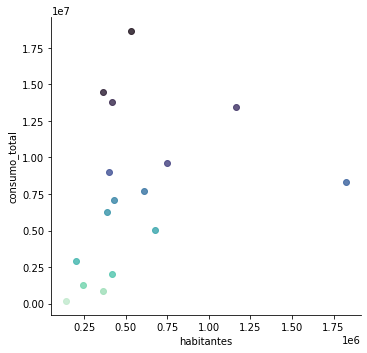

In [64]:
sns.lmplot( x="habitantes", y="consumo_total",\
           data=hab, fit_reg=False, hue='alcaldia', legend=False, palette='mako')

Los datos de habitantes por alcaldia fueron tomados del senso realizado por el inegi en 2015, que son los datos que le corresponden al dataset con el que estamos trabajando.

Como vemos, los datos no presentan relación alguna, lo que nos no dice que no existe  algun nexo entre el numero de habitantes con el consumo total por alcaldia. 

¿Y entre consumo domestico total y población existe alguna relación?

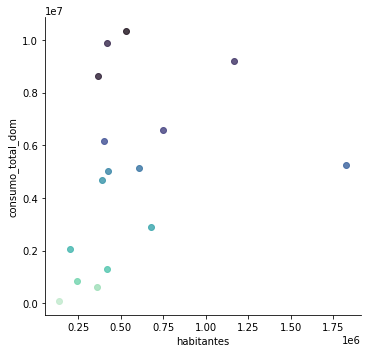

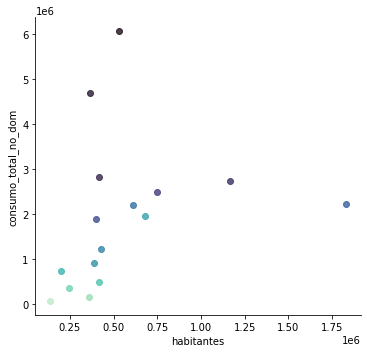

In [65]:
sns.lmplot( x="habitantes", y="consumo_total_dom",\
           data=hab, fit_reg=False, hue='alcaldia', legend=False, palette='mako')
plt.show()

sns.lmplot( x="habitantes", y="consumo_total_no_dom",\
           data=hab, fit_reg=False, hue='alcaldia', legend=False, palette='mako')
plt.show()

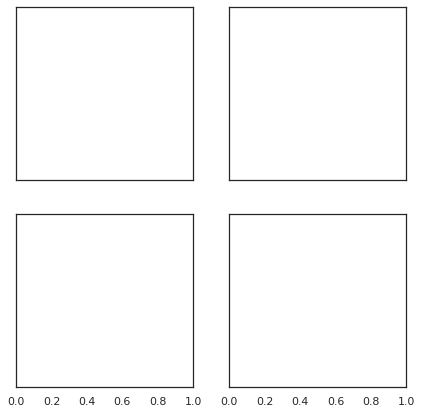

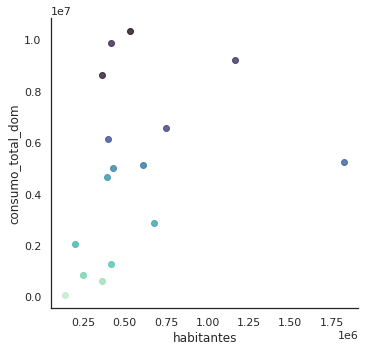

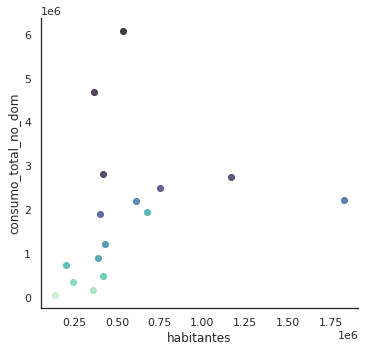

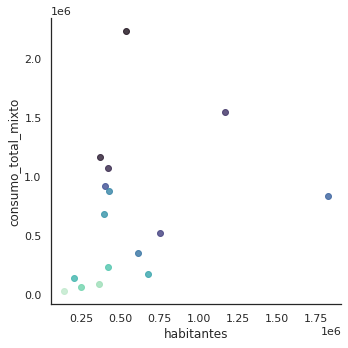

In [75]:
sns.set(style="white", palette="mako", color_codes=True)


# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)



sns.lmplot( x="habitantes", y="consumo_total_dom",\
           data=hab, fit_reg=False, hue='alcaldia', legend=False, palette='mako')

# Plot a kernel density estimate and rug plot
sns.lmplot( x="habitantes", y="consumo_total_no_dom",\
           data=hab, fit_reg=False, hue='alcaldia', legend=False, palette='mako')

# Plot a filled kernel density estimate
sns.lmplot( x="habitantes", y="consumo_total_mixto",\
           data=hab, fit_reg=False, hue='alcaldia', legend=False, palette='mako')

plt.setp(axes, yticks=[])
plt.tight_layout()



cant de habitantes vs la cantidad de datos por alcaldía, cant. habitatntes vs índice por alcaldía

In [60]:

can_dat = pd.DataFrame(df['alcaldia'].value_counts())


can_dat.rename(columns = {'alcaldia':'cant_datos'}, inplace = True)


can_dat['alcaldia'] = can_dat.index

hab = pd.merge(hab, can_dat, how ='left', on ='alcaldia')\
.sort_values(by=['consumo_total'], ascending=False)

hab['consumo_total_verif'] =  hab['consumo_total_dom'] + hab['consumo_total_no_dom'] +hab['consumo_total_mixto']

hab.head()

,alcaldia,consumo_total,consumo_total_dom,consumo_total_no_dom,consumo_total_mixto,consumo_prom,consumo_prom_dom,consumo_prom_no_dom,habitantes,cant_datos,consumo_total_verif
0,cuauhtemoc,18650818.44,1.034611e+07,6074370.831,2230334.04,1.233967e+06,176414.349961,1.349030e+06,532553,7313,1.865082e+07
1,miguel hidalgo,14490397.15,8.640463e+06,4687309.460,1162625.38,9.853498e+05,212477.984926,1.179413e+06,364439,5110,1.449040e+07
2,benito juarez,13780118.64,9.894931e+06,2815269.571,1069917.90,4.439559e+05,147798.334937,5.998937e+05,417416,6049,1.378012e+07
3,gustavo a. madero,13480100.57,9.196449e+06,2740658.660,1542992.79,8.862796e+05,284723.303485,8.952375e+05,1164477,10058,1.348010e+07
4,alvaro obregon,9608502.55,6.590161e+06,2492864.010,525476.88,5.722891e+05,165140.826183,7.491385e+05,749982,4140,9.608502e+06


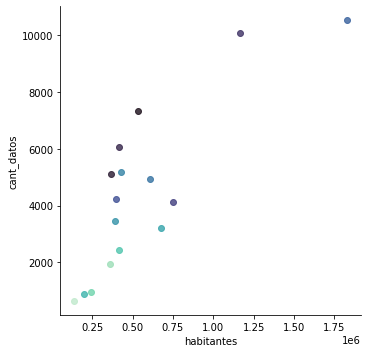

In [48]:
sns.lmplot( x="habitantes", y="cant_datos",\
           data=hab, fit_reg=False, hue='alcaldia', legend = False, palette='mako')

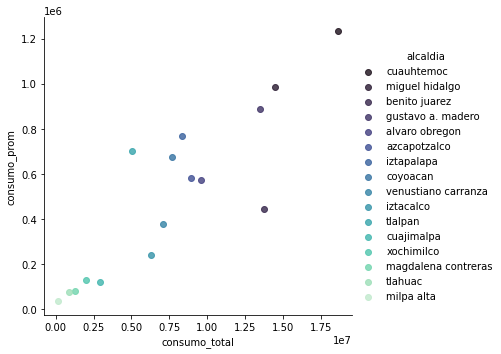

In [49]:
sns.lmplot( x="consumo_total", y="consumo_prom",\
           data=hab, fit_reg=False, hue='alcaldia', legend=True, palette='mako')

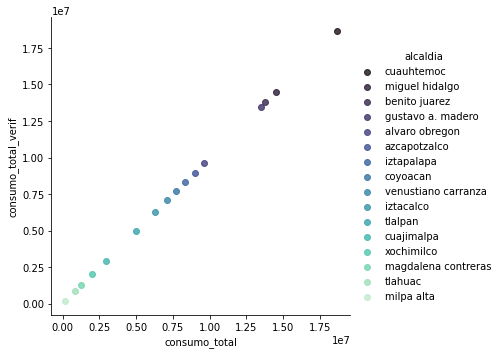

In [61]:
sns.lmplot( x="consumo_total", y="consumo_total_verif",\
           data=hab, fit_reg=False, hue='alcaldia', legend=True, palette='mako')